In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing dataset
sleepdata = pd.read_csv("sleepdisorder-filtered.csv")

We will remove the "Person ID" variable since it won't be used in our model

In [3]:
sleepdata = sleepdata.drop('Person ID', axis = 1) 

In [4]:
#OneHot Label Encoder
hot = pd.get_dummies(sleepdata[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']])
sleepdata = pd.concat([sleepdata, hot], axis = 1)
sleepdata = sleepdata.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1)

Seperating feature variables and target variables

In [5]:
x = sleepdata.drop('Sleep Disorder', axis = 1)
x = x.values
y = sleepdata['Sleep Disorder']
y.fillna('None', inplace=True)

Scaling data to ensure contribution equality of each feature and to prevent certain features from dominating due to their scale

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)

Seperating our data into train and test data. We will use 25% of our data to test the machine learning models

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_standard, y, test_size = 0.25, random_state = 0)

We will now try to make multiple models and compare their results

# Naive Bayes

This model produced a really poor result with only 51% accuracy. It was able to predict people with sleeping disorders pretty accurately, but was really bad in predicting who don't have any sleeping disorders.

Score:  0.5106382978723404


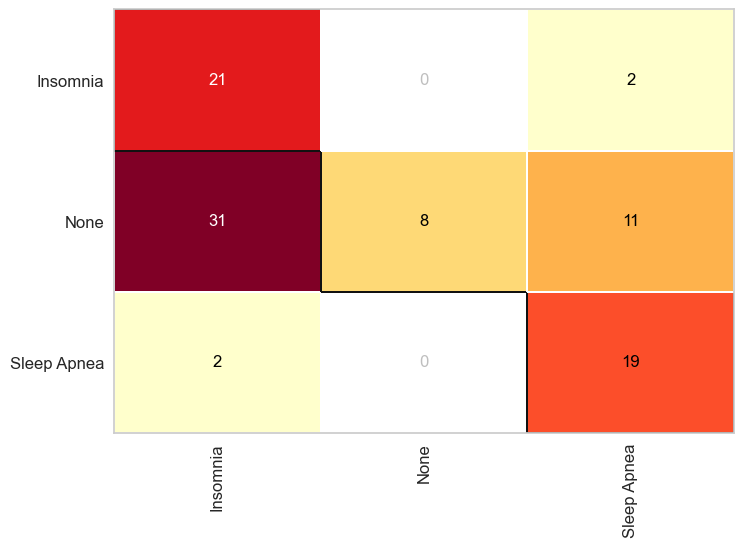

In [8]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
score_naive_bayes = cm.score(x_test, y_test)
print('Score: ', score_naive_bayes)

# Decision Tree

Before running the decision tree, we will first apply GridSearch to check for the best metrics to use.

In [9]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(x_train, y_train)

print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Min Split:  2
Max Nvl:  4
Algorithm:  gini
Score:  0.8891557995881949


This model has an accuracy of 88.30%. It is able to predict the three classes quite accurately and is a much better model compared to the Naive Bayes model.

Score:  0.8829787234042553


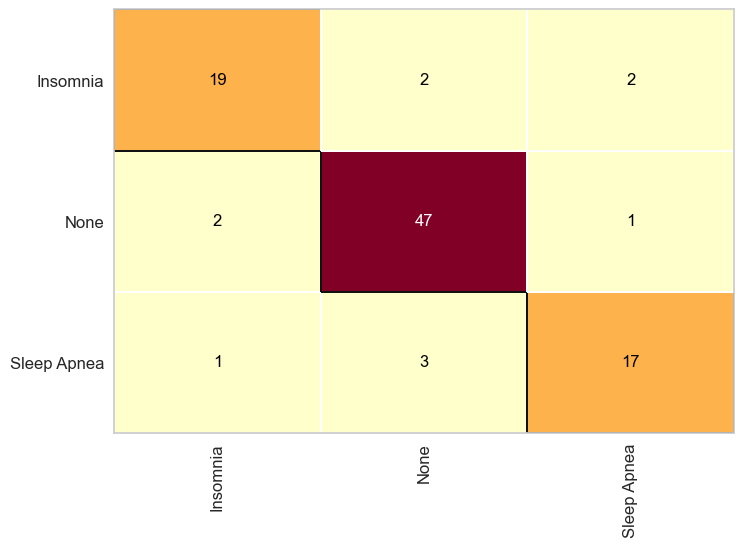

In [10]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 4, random_state=0)
decision_tree.fit(x_train, y_train)

cm = ConfusionMatrix(decision_tree)
cm.fit(x_train, y_train)
score_decision_tree = cm.score(x_test, y_test)
print('Score: ', score_decision_tree)

# Random Forest

We will once again use GridSearch to check for the best metrics

In [11]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(x_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.8964285714285716
Min Split:  3
Max Nvl:  7


The Random Forest Model was able to further improve accuracy from the previous models, achieving an accuracy of 91.49%.

Score:  0.9148936170212766


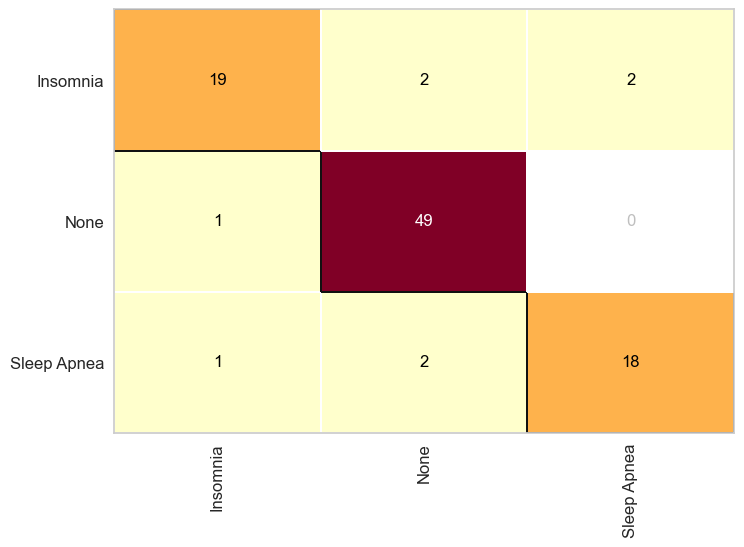

In [12]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 3, max_depth= 7,  criterion = 'entropy', random_state = 0)
random_forest.fit(x_train, y_train)

cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
score_random_forest = cm.score(x_test, y_test)
print('Score: ', score_random_forest)

# Extra Trees

Using GridSearch to check for the best metrics to use

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = ExtraTreesClassifier()
gridExtraTrees = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridExtraTrees.fit(x_train, y_train)

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)
print('Min Split: ', gridExtraTrees.best_estimator_.min_samples_split)
print('Max Nvl: ', gridExtraTrees.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8963242583695569
Min Split:  2
Max Nvl:  6


Although this model has a slightly lower accuracy score when compared to the Random Forest model, it is still a great model with 88.30% accuracy.

Score:  0.8829787234042553


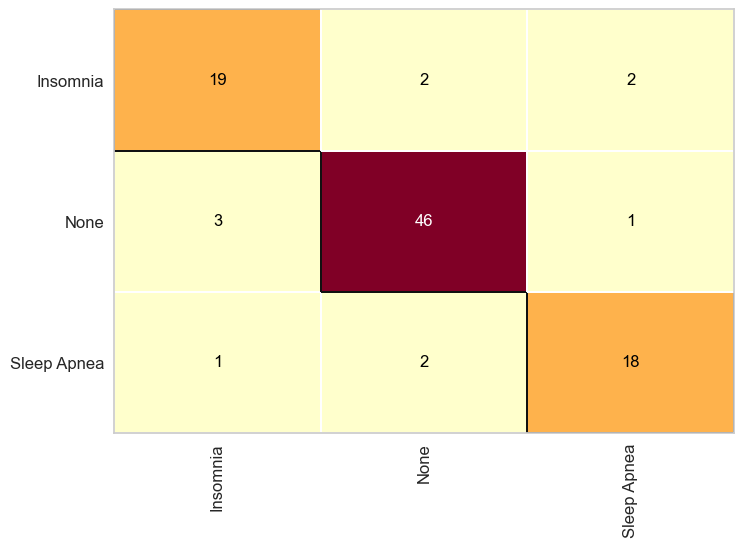

In [14]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 6, criterion = 'gini', random_state = 0)
extra_trees.fit(x_train, y_train)

cm = ConfusionMatrix(extra_trees)
cm.fit(x_train, y_train)
score_extra_trees = cm.score(x_test, y_test)
print('Score: ', score_extra_trees)

# K-Nearest Neighbors (KNN)

Using GridSearch to check for the best metrics to use

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(x_train, y_train)

print('Score: ', grid.best_score_)
grid.best_params_

Score:  0.875


{'n_neighbors': 5}

This model also has a lower accuracy score when compared to Random Forest, but it is still a great model with 89.36% accuracy.

Score:  0.8936170212765957


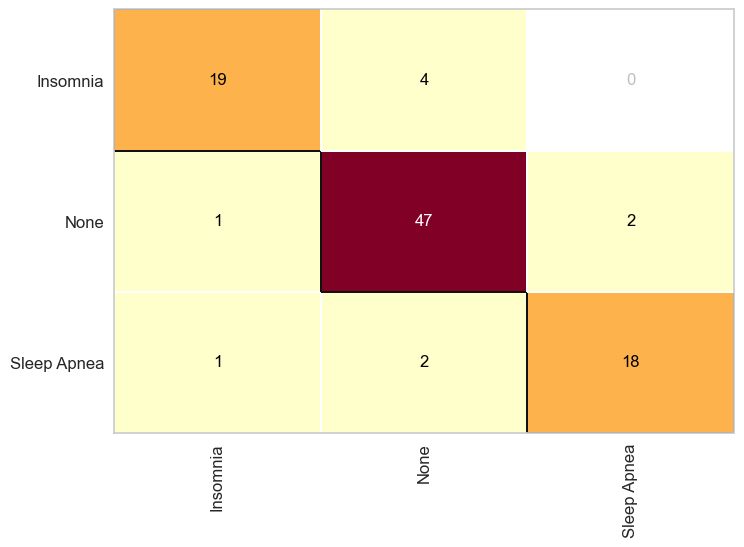

In [16]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
score_knn = cm.score(x_test, y_test)
print('Score: ', score_knn)

# Logistic Regression

The Logistic Regression Model produced great results, achieving an accuracy rate on par with the Random Forest model at 91.49%.

Score:  0.9148936170212766


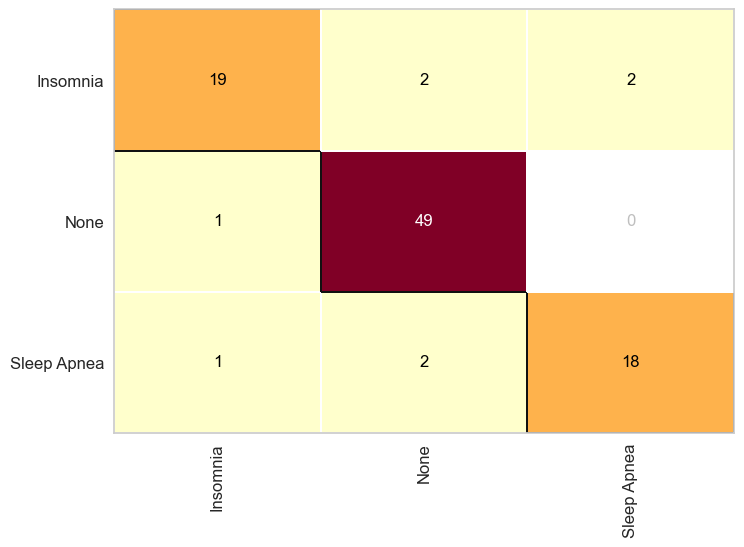

In [17]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(x_train, y_train)

cm = ConfusionMatrix(logistic)
cm.fit(x_train, y_train)
score_logistic = cm.score(x_test, y_test)
print('Score: ', score_logistic)

# Ada Boost

Using GridSearch to check for the best metrics to use

In [18]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.001, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 2, n_jobs = -1)
gridAdaBoost.fit(x_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate:  0.01
Score:  0.8821428571428571


Although this model has a slightly lower accuracy score when compared to some other models, it is still pretty decent with 88.30% accuracy.

C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Score:  0.8829787234042553


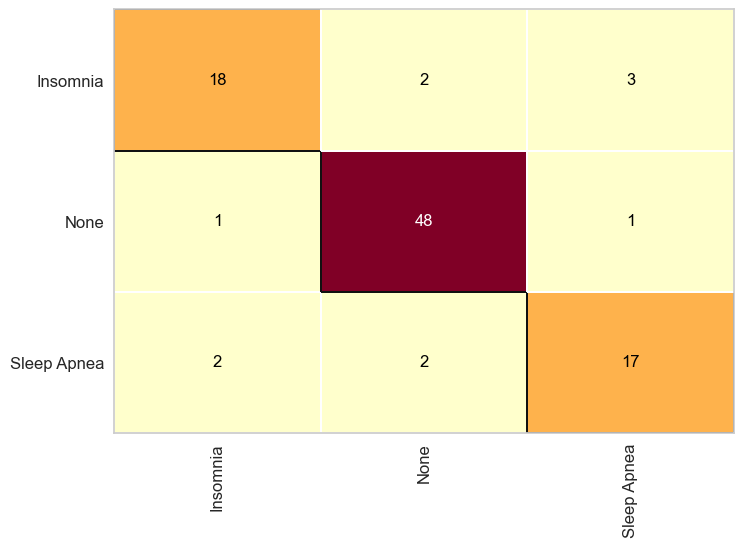

In [19]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate =  0.01, random_state = 0)
ada_boost.fit(x_train, y_train)

cm = ConfusionMatrix(ada_boost)
cm.fit(x_train, y_train)
score_ada_boost = cm.score(x_test, y_test)
print('Score: ', score_ada_boost)

# Gradient Boosting

Using GridSearch to check for the best metrics to use

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(x_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.005
Score:  0.8928571428571429


This is another great model, producing results that are on par with the other "best" models that we've tested so far. It has an accuracy of 91.49%.

Score:  0.9148936170212766


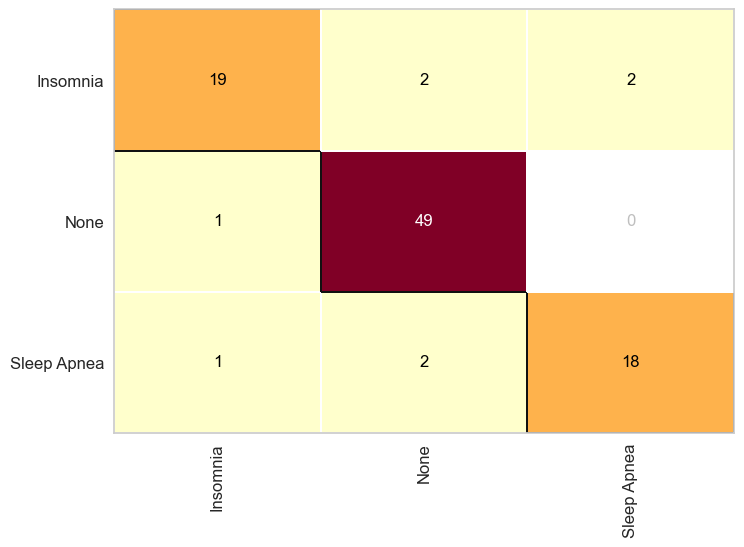

In [21]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.005, random_state = 0)
grad_boost.fit(x_train, y_train)

cm = ConfusionMatrix(grad_boost)
cm.fit(x_train, y_train)
score_gradient_boosting = cm.score(x_test, y_test)
print('Score: ', score_gradient_boosting)

# LGBM

Using GridSearch to check for the best metrics to use

In [22]:
from lightgbm import LGBMClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'min_child_samples': [1, 3, 5, 7, 9, 15],
              'num_leaves': [3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }
    
model = LGBMClassifier()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
lgbm_grid.fit(x_train, y_train.ravel())

print('Score: ', lgbm_grid.best_score_)
print('Params: ', lgbm_grid.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 26
[LightGBM] [Info] Start training from score -1.645806
[LightGBM] [Info] Start training from score -0.504891
[LightGBM] [Info] Start training from score -1.591738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Although this model has a slightly lower accuracy score when compared to some other models, it is still a great model with 90.43% accuracy.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 26
[LightGBM] [Info] Start training from score -1.645806
[LightGBM] [Info] Start training from score -0.504891
[LightGBM] [Info] Start training from score -1.591738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

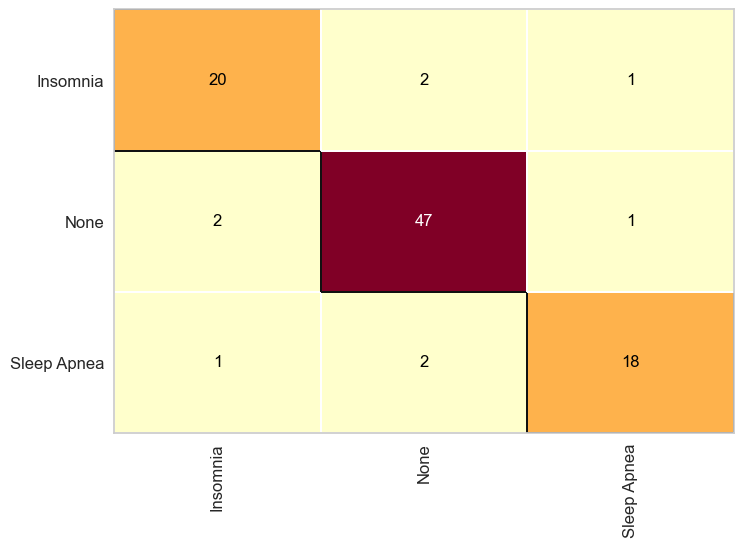

In [23]:
lgbm = LGBMClassifier(subsample = 0.1, reg_lambda = 0.9, reg_alpha = 0.5, num_leaves = 7, n_estimators = 500, min_child_weight = 3, min_child_samples = 3, max_depth = 9, learning_rate = 0.1, colsample_bytree = 0.7, random_state = 0)
lgbm.fit(x_train, y_train)

cm = ConfusionMatrix(lgbm)
cm.fit(x_train, y_train)
score_lgbm = cm.score(x_test, y_test)
print('Score: ', score_lgbm)

# Results

In [24]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_bayes}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_decision_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random_forest}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra_trees}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_logistic}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_boost}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_gradient_boosting}

lgbm_dict_v1 = {'Model':'LGBM',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_lgbm}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'LGBM':pd.Series(lgbm_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,Logistic Regression,AdaBoost,GradientBoosting,LGBM
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,Logistic Regression,AdaBoost,GradientBoost,LGBM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal Data,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,-,-
Precision,0.510638,0.882979,0.914894,0.882979,0.893617,0.914894,0.882979,0.914894,0.904255


All the models we have tested except for Naive Bayes had excellent results. Random Forest, Logistic Regression, and Gradient Boosting were the best models with 91.49% accuracy, managing to hit the 3 classes very well.